Importação das Bibiliotecas e Abertura dos Datasets da Copa de 2014 e 2018

In [36]:
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

uploaded = files.upload()

filename = next(iter(uploaded))

data_2014 = pd.read_json(filename)
df_2014 = pd.json_normalize(data_2014['groups'], record_path=['standings'], meta=['name'])

print(f"Arquivo {filename} carregado com sucesso!")
print(df_2014.head())

Saving worldcup2014.json to worldcup2014 (6).json
Arquivo worldcup2014 (6).json carregado com sucesso!
   pos  played  won  drawn  lost  goals_for  goals_against  pts    team.name  \
0    1       3    2      1     0          7              2    7       Brazil   
1    2       3    2      1     0          4              1    7       Mexico   
2    3       3    1      0     2          6              6    3      Croatia   
3    4       3    0      0     3          1              9    0     Cameroon   
4    1       3    3      0     0         10              3    9  Netherlands   

  team.code     name  
0       BRA  Group A  
1       MEX  Group A  
2       CRO  Group A  
3       CMR  Group A  
4       NED  Group B  


In [37]:
uploaded = files.upload()

filename = next(iter(uploaded))

data_2018 = pd.read_json(filename)

df_2018 = pd.json_normalize(data_2018['groups'], record_path=['standings'], meta=['name'])

print(f"Arquivo {filename} carregado com sucesso!")
print(df_2018.head())

Saving worldcup2018.json to worldcup2018 (4).json
Arquivo worldcup2018 (4).json carregado com sucesso!
   pos  played  won  drawn  lost  goals_for  goals_against  pts     team.name  \
0    1       3    3      0     0          5              0    9       Uruguay   
1    2       3    2      0     1          8              4    6        Russia   
2    3       3    1      0     2          2              7    3  Saudi Arabia   
3    4       3    0      0     3          2              6    0         Egypt   
4    1       3    1      2     0          6              5    5         Spain   

  team.code     name  
0       URU  Group A  
1       RUS  Group A  
2       KSA  Group A  
3       EGY  Group A  
4       ESP  Group B  


Descrição Estatística dos Datasets

In [38]:
df_2014.describe()

,pos,played,won,drawn,lost,goals_for,goals_against,pts
count,32.000000,32.0,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000
mean,2.500000,3.0,1.218750,0.562500,1.21875,4.250000,4.250000,4.218750
std,1.135924,0.0,1.007532,0.564401,0.97499,2.314052,2.228843,2.881917
min,1.000000,3.0,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
25%,1.750000,3.0,0.000000,0.000000,0.00000,2.750000,3.000000,1.750000
50%,2.500000,3.0,1.000000,1.000000,1.00000,4.000000,4.000000,4.000000
75%,3.250000,3.0,2.000000,1.000000,2.00000,6.000000,6.000000,7.000000
max,4.000000,3.0,3.000000,2.000000,3.00000,10.000000,9.000000,9.000000


In [39]:
df_2018.describe()

,pos,played,won,drawn,lost,goals_for,goals_against,pts
count,32.000000,32.0,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.500000,3.0,1.21875,0.562500,1.218750,3.812500,3.812500,4.218750
std,1.135924,0.0,0.87009,0.715609,0.941323,2.070336,2.249552,2.485239
min,1.000000,3.0,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,1.750000,3.0,1.00000,0.000000,0.000000,2.000000,2.000000,3.000000
50%,2.500000,3.0,1.00000,0.000000,1.000000,3.000000,4.000000,4.000000
75%,3.250000,3.0,2.00000,1.000000,2.000000,5.000000,5.000000,6.000000
max,4.000000,3.0,3.00000,2.000000,3.000000,9.000000,11.000000,9.000000


Concatenando os Datasets

In [40]:
df = pd.concat([df_2018, df_2014])

Gráfico de Gols Marcados

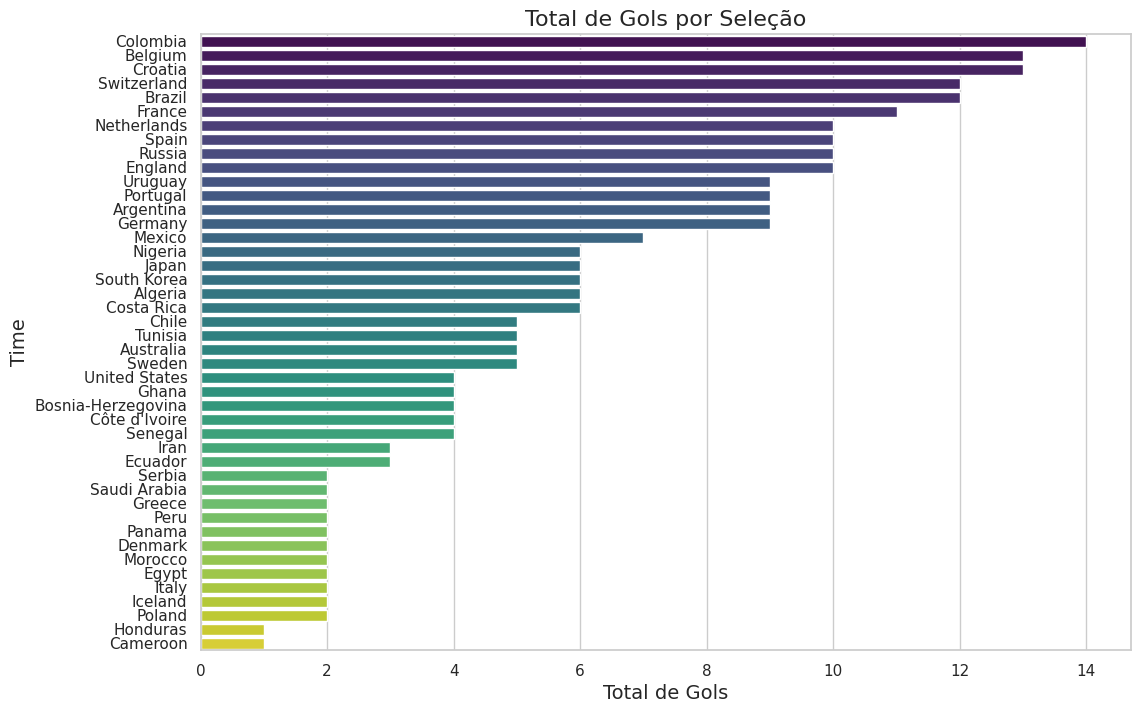

In [41]:
goals_by_team = df.groupby('team.name')['goals_for'].sum().reset_index()

goals_by_team = goals_by_team.sort_values(by='goals_for', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='goals_for', y='team.name', hue='team.name', data=goals_by_team, dodge=False, palette='viridis', legend=False)

plt.title('Total de Gols por Seleção', fontsize=16)
plt.xlabel('Total de Gols', fontsize=14)
plt.ylabel('Time', fontsize=14)

plt.show()

Gráfico de Gols Sofridos

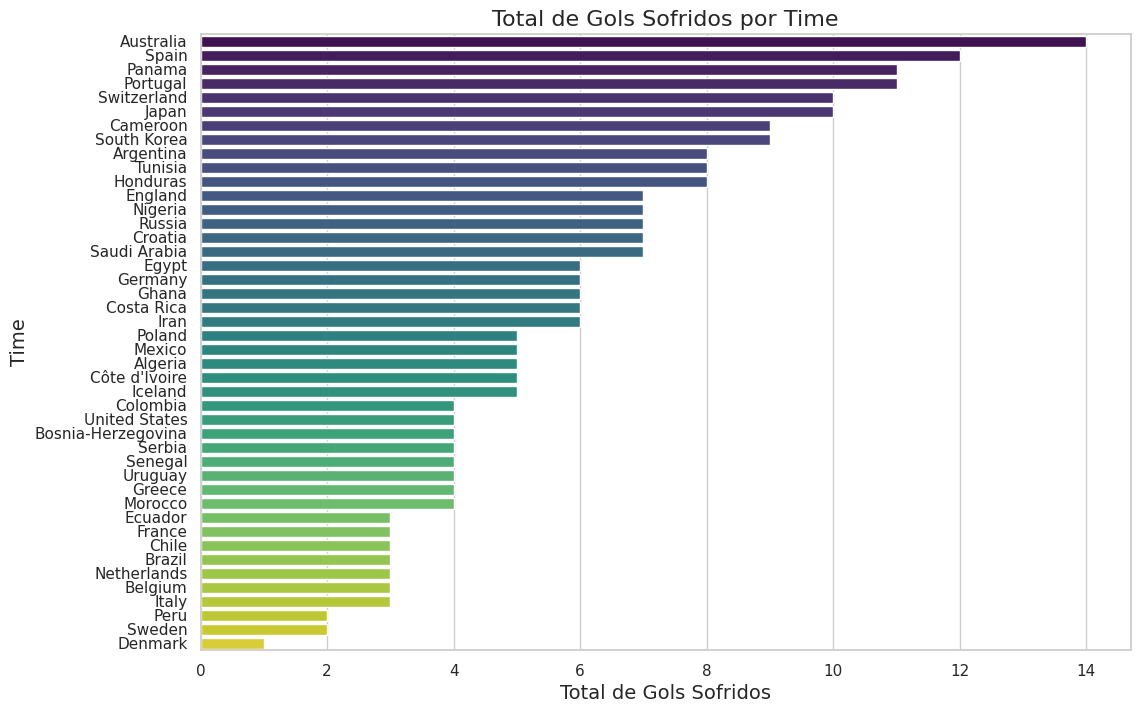

In [42]:
goals_against_by_team = df.groupby('team.name')['goals_against'].sum().reset_index()

goals_against_by_team = goals_against_by_team.sort_values(by='goals_against', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='goals_against', y='team.name', hue='team.name', data=goals_against_by_team, dodge=False, palette='viridis', legend=False)

plt.title('Total de Gols Sofridos por Time', fontsize=16)
plt.xlabel('Total de Gols Sofridos', fontsize=14)
plt.ylabel('Time', fontsize=14)

# Mostrar o gráfico
plt.show()

Gráficos de Correlação

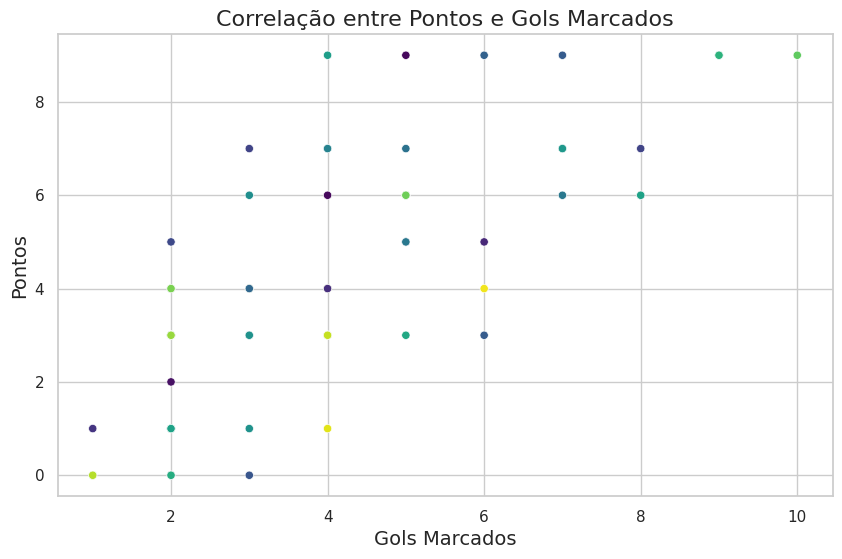

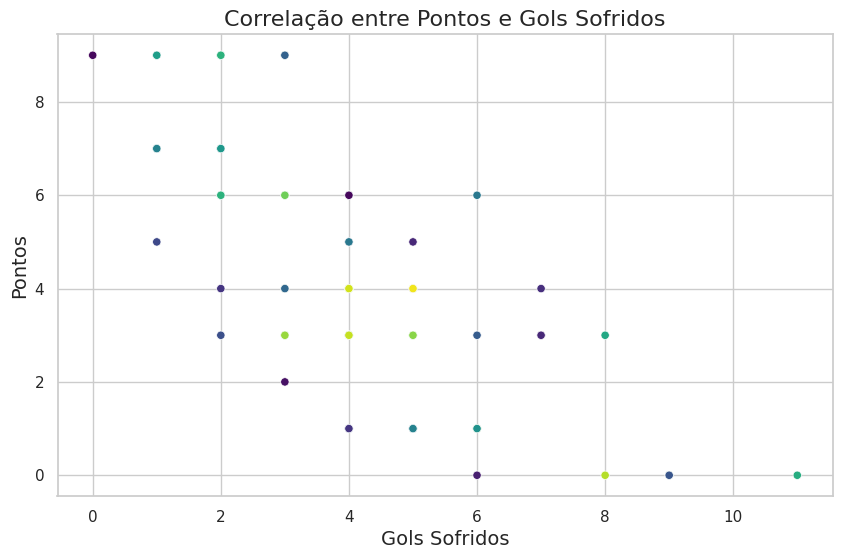

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='goals_for', y='pts', data=df, hue='team.name', palette='viridis', legend=False)
plt.title('Correlação entre Pontos e Gols Marcados', fontsize=16)
plt.xlabel('Gols Marcados', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='goals_against', y='pts', data=df, hue='team.name', palette='viridis', legend=False)
plt.title('Correlação entre Pontos e Gols Sofridos', fontsize=16)
plt.xlabel('Gols Sofridos', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show()

Selecionar as colunas de interesse

In [44]:
features = ['pos', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'pts']
df = df[features]

Adicionar uma coluna 'advanced' que é 1 se a equipe avançou e 0 caso contrário

In [45]:
df['advanced'] = df['pos'].apply(lambda x: 1 if x <= 2 else 0)

Remoção de 'pos' da lista de features

In [46]:
features.remove('pos')

Divisão dos dados em conjuntos de treinamento e teste.<br>
Treino de modelo de regressão logística.<br>
Predição da probabilidade de a equipe avançar.

A probabilidade de a equipe avançar é 0.97


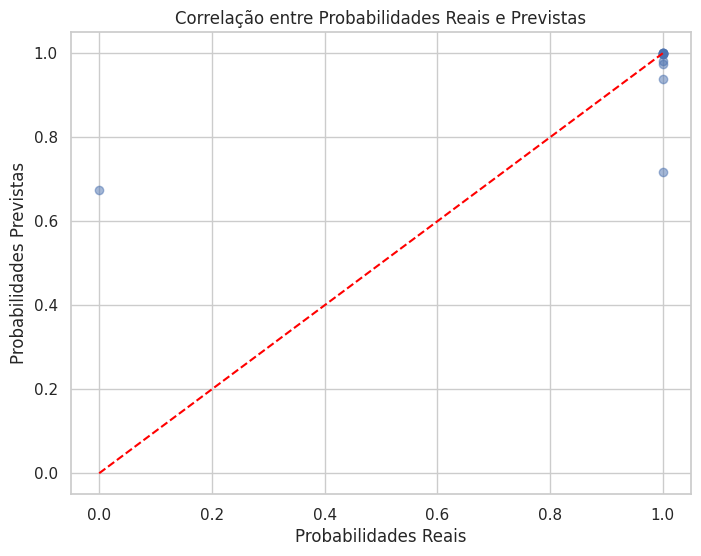

In [48]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df[features], df['advanced'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

team_data = {'won': 1, 'drawn': 2, 'lost': 0, 'goals_for': 3, 'goals_against': 5, 'pts': 5}
team_df = pd.DataFrame([team_data])

prob = model.predict_proba(team_df[features])[0][1]

print(f'A probabilidade de a equipe avançar é {prob:.2f}')

y_pred_proba = model.predict_proba(X_test)[:, 1]

correlation = pd.Series(y_test).corr(pd.Series(y_pred_proba))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.title('Correlação entre Probabilidades Reais e Previstas')
plt.xlabel('Probabilidades Reais')
plt.ylabel('Probabilidades Previstas')
plt.grid(True)

x_values = np.linspace(0, 1, 100)
y_values = x_values
plt.plot(x_values, y_values, color='red', linestyle='--')

plt.show()

Upar o terceiro dataset

In [28]:
uploaded = files.upload()

filename = next(iter(uploaded))

data = pd.read_json(filename)

print(f"Arquivo {filename} carregado com sucesso!")

Saving worldcup.json to worldcup.json
Arquivo worldcup.json carregado com sucesso!


Extração das rodadas de interesse.<br>
Criação do DataFrame com os dados.<br>
Visualizar as primeiras linhas.<br>

In [29]:
matches = data['rounds']
knockout_rounds = ['Round of 16', 'Quarter-finals', 'Semi-finals', 'Final']
matches = [match for match in matches if match['name'] in knockout_rounds]

df = pd.DataFrame(matches)

print(df.head())

             name                                            matches
0     Round of 16  [{'num': 49, 'date': '2018-06-30', 'time': '21...
1  Quarter-finals  [{'num': 57, 'date': '2018-07-06', 'time': '17...
2     Semi-finals  [{'num': 61, 'date': '2018-07-10', 'time': '21...
3           Final  [{'num': 64, 'date': '2018-07-15', 'time': '18...


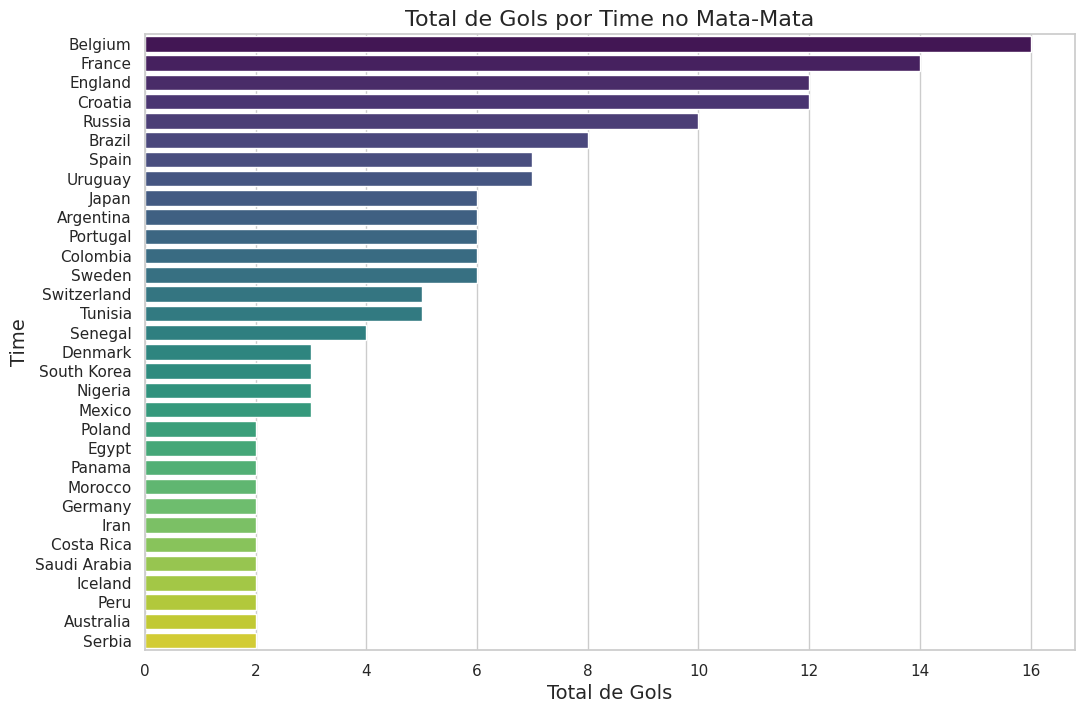

In [33]:
goals_per_team = {}

for round in data['rounds']:
    for match in round['matches']:
        team1 = match['team1']['name']
        team2 = match['team2']['name']
        score1 = match['score1']
        score2 = match['score2']

        if team1 not in goals_per_team:
            goals_per_team[team1] = 0
        if team2 not in goals_per_team:
            goals_per_team[team2] = 0

        goals_per_team[team1] += score1
        goals_per_team[team2] += score2

df_gols = pd.DataFrame(list(goals_per_team.items()), columns=['Team', 'Goals'])

df_gols = df_gols.sort_values(by='Goals', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Goals', y='Team', hue='Team', data=df_gols, dodge=False, palette='viridis', legend=False)

plt.title('Total de Gols por Time no Mata-Mata', fontsize=16)
plt.xlabel('Total de Gols', fontsize=14)
plt.ylabel('Time', fontsize=14)

plt.show()